In [1]:
import glob
from datetime import datetime
from datetime import timedelta
import numpy as np
import pandas as pd
import xarray as xr
import multiprocessing as mp
import matplotlib.pyplot as plt

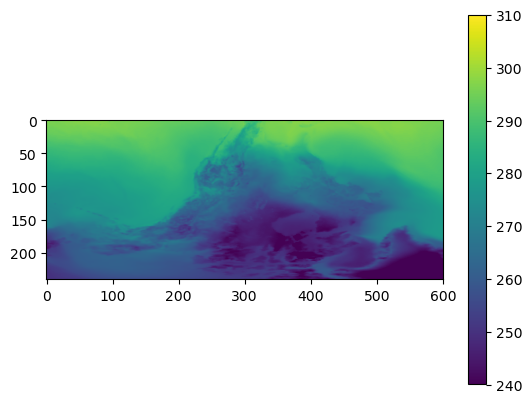

In [6]:
ds_temp = xr.open_dataset('/glade/derecho/scratch/jhayron/Data4Predictability/TEMP_ERA5_Daily/TMean_1981020100_1981022823.nc')
plt.imshow(ds_temp.MeanTemp[0],vmin=240,vmax=310)
plt.colorbar()

In [7]:
def merge_datasets(full_dataset, ds_temp):
    # Ensure dates are aligned properly and handle overlapping dates
    combined = xr.concat([full_dataset, ds_temp], dim='time')
    return combined

In [9]:
path_files = '/glade/derecho/scratch/jhayron/Data4Predictability/TEMP_ERA5_Daily/'
files_mean = np.sort(glob.glob(f'{path_files}TMean*.nc'))
# files_max = np.sort(glob.glob(f'{path_files}TMax*.nc'))
# files_min = np.sort(glob.glob(f'{path_files}TMin*.nc'))

In [11]:
full_dataset = xr.open_dataset(files_mean[0])
for file in files_mean[1:]:
    ds_temp = xr.open_dataset(file)
    full_dataset = merge_datasets(full_dataset, ds_temp)
full_dataset.to_netcdf('/glade/derecho/scratch/jhayron/Data4Predictability/TMean_ERA5_Daily.nc')